In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from matplotlib import ticker, cm

In [2]:
def get_fes(bins, val):
    F = []
    s = []
    kT = 1
    mesh = (bins[1] - bins[0])/2
    i = 0
    min = -kT * math.log(val[0])

    while val[i] != 0 and i<len(val)-1:
        F.append(-kT * math.log(val[i]))
        s.append(bins[i] + mesh)
        if F[i] < min:
            min = F[i]
        i = i + 1

    # Remove the offset
    F = F - min*np.ones(len(F))
    return F, s

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4168/2827131595.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  rmsd = plumed.read_as_pandas("data/rmsd.dat")


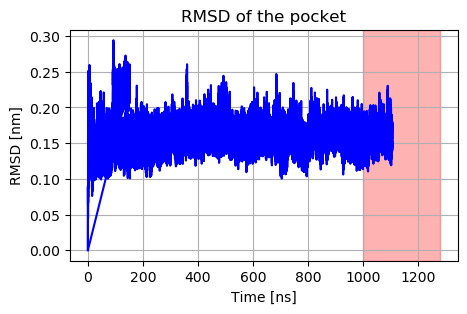

In [3]:
#gyration = plumed.read_as_pandas("data/gyration.dat")
rmsd = plumed.read_as_pandas("data/rmsd.dat")

plt.rcParams["figure.figsize"] = (5, 3)

plt.plot(rmsd["time"]*0.001, rmsd["rmsd_pocket"], 'b')
plt.axvspan(1000, 1280, color='red', alpha=0.3)
plt.grid()
plt.title("RMSD of the pocket")
plt.xlabel("Time [ns]")
plt.ylabel("RMSD [nm]")
plt.savefig("pics/RMSD_alone.png", bbox_inches="tight")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4168/2938378200.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  rmsd_fes = plumed.read_as_pandas("F_REW_RMSD.dat")


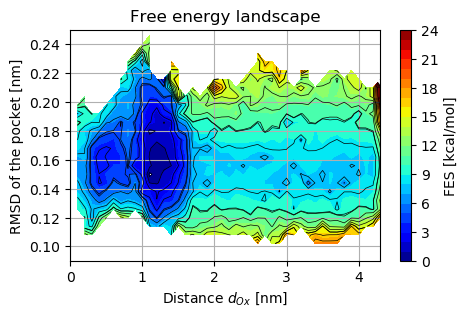

In [6]:
# plumed driver --plumed reweight_rmsd.dat --noatoms
rmsd_fes = plumed.read_as_pandas("F_REW_RMSD.dat")

# number of bins
grid_min_x = 0.0
grid_max_x = 5.0
grid_min_y = 0.0
grid_max_y = 0.30
nx = 50
ny = 50
x = np.linspace(grid_min_x, grid_max_x, num=nx+1)
y = np.linspace(grid_min_y, grid_max_y, num=ny+1)
rmsd_rew = np.array(rmsd_fes["f_reweighted"]).reshape(nx + 1,ny + 1)

plt.figure(figsize=(5, 3))  # Adjust figure size as needed

flat_matrix = rmsd_rew.flatten()
finite_values = [x for x in flat_matrix if np.isfinite(x)]

plt.contour(x, y, rmsd_rew/4.184, levels=range(0,int(np.max(finite_values)/4.184),5), linewidths=0.5, colors='k')
cntr = plt.contourf(x, y, rmsd_rew/4.184, levels=range(0,25), cmap=cm.jet)
plt.colorbar(cntr, label="FES [kcal/mol]")

#plt.colorbar(label='FES [kcal/mol]')  # Add color bar indicating density
plt.grid()
levels = np.linspace(rmsd_rew.min()/4.184, 24, 20)  # Adjust number of contour levels as needed
plt.contour(x, y, rmsd_rew/4.184, levels=levels, colors='black', linewidths=0.5)
plt.title("Free energy landscape")
plt.xlabel(r"Distance $d_{Ox}$ [nm]")
plt.ylabel("RMSD of the pocket [nm]")
plt.xlim([0, 4.3])
plt.ylim([0.09, 0.25])

# Save the plot
plt.savefig("pics/FES_rmsd.png", bbox_inches="tight")

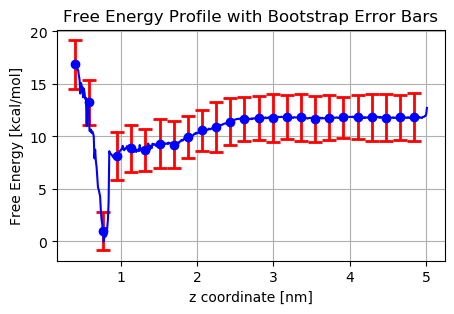

In [23]:
# Generate Bootstrap Samples
# Assuming you have n data points (distances and corresponding free energies), 
# you can create N bootstrap samples

# Number of bootstrap samples
N = 500

# Function to generate bootstrap samples
def generate_bootstrap_samples(data, N):
    n = len(data)
    bootstrap_samples = np.random.choice(data, (N, n), replace=True)
    return bootstrap_samples

bootstrap_samples = generate_bootstrap_samples(F/4.184, N)

# Calculate the standard deviation of the bootstrap samples
errors = np.std(bootstrap_samples, axis=0)

# Combine distance points, free energies, and errors for better visualization
free_energy_with_errors = list(zip(dist, F/4.184, errors))

step = 20
plt.rcParams["figure.figsize"] = (5, 3)
plt.errorbar(dist[::step], F[::step]/4.184, yerr=errors[::step], fmt='o', color='b', ecolor='r', capsize=5, capthick=2, elinewidth=2)
plt.plot(dist, F/4.184, 'b')
plt.title('Free Energy Profile with Bootstrap Error Bars')
plt.xlabel('z coordinate [nm]')
plt.ylabel('Free Energy [kcal/mol]')
plt.grid(True)
plt.show()